# Classification after Clustering with Agglomerative Clustering

### Import CSV and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"./data/clustered_data.csv")
# Print shape of dataset
print(df.shape)

(2240, 22)


In [2]:
df.head()

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth,cluster
0,65,2,0,0,0,58138.0,1617.0,4525.0,58,635,81,546,120.5,81,88.0,8,10,4,3,0,7,0
1,68,2,0,1,2,46344.0,27.0,3975.0,38,11,1,6,2.0,1,6.0,1,1,2,2,0,5,2
2,57,2,1,0,0,71613.0,776.0,4174.0,26,426,49,127,111.0,21,42.0,8,2,10,1,0,4,3
3,38,2,1,1,1,26646.0,53.0,4001.0,26,11,4,20,10.0,3,5.0,2,0,4,2,0,6,2
4,41,4,1,1,1,58293.0,422.0,4023.0,94,173,43,118,46.0,27,15.0,5,3,6,5,0,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2240 non-null   int64  
 1   Education           2240 non-null   int64  
 2   Marital Status      2240 non-null   int64  
 3   Parental Status     2240 non-null   int64  
 4   Children            2240 non-null   int64  
 5   Income              2240 non-null   float64
 6   Total_Spending      2240 non-null   float64
 7   Days_as_Customer    2240 non-null   float64
 8   Recency             2240 non-null   int64  
 9   Wines               2240 non-null   int64  
 10  Fruits              2240 non-null   int64  
 11  Meat                2240 non-null   int64  
 12  Fish                2240 non-null   float64
 13  Sweets              2240 non-null   int64  
 14  Gold                2240 non-null   float64
 15  Web                 2240 non-null   int64  
 16  Catalo

In [4]:
X = df.drop("cluster", axis=1) #dropping the target column which is 'cluster'
y = df["cluster"]

## Grid Search

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics 

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

- ### We will create a generic function to check each model's performance so that we can compare those

In [6]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    

    models_list = []
    scores = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_pred = model.predict(X_test)

        score = accuracy_score(y_test,y_pred)
        
        model_name = list(models.keys())[i]
        print(f'---- score for --- {model_name} ----')
        print(f"{score}")
        models_list.append(model_name)
        scores.append(score)
    
    print()
    
    report = pd.DataFrame()
    report['Model_name'] = models_list
    report['Score'] = scores        
    return report

### Let's check the report

In [7]:
report = evaluate_models(X, y, models)

---- score for --- Random Forest ----
0.8258928571428571
---- score for --- Decision Tree ----
0.7522321428571429
---- score for --- Gradient Boosting ----
0.8303571428571429
---- score for --- Logistic Regression ----
0.5959821428571429
---- score for --- K-Neighbors Classifier ----
0.5401785714285714
---- score for --- XGBClassifier ----
0.8392857142857143
---- score for --- CatBoosting Classifier ----
0.8392857142857143
---- score for --- AdaBoost Classifier ----
0.6517857142857143



In [8]:
report.sort_values('Score')

,Model_name,Score
4,K-Neighbors Classifier,0.540179
3,Logistic Regression,0.595982
7,AdaBoost Classifier,0.651786
1,Decision Tree,0.752232
0,Random Forest,0.825893
2,Gradient Boosting,0.830357
5,XGBClassifier,0.839286
6,CatBoosting Classifier,0.839286


In [9]:
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
994,68,2,0,1,2,64587.0,108.0,3869.0,49,66,0,16,0.0,6,20.0,1,1,4,2,0,3
2162,65,2,1,1,1,47320.0,414.0,4194.0,10,200,19,111,50.0,15,19.0,5,1,8,6,0,6
906,61,2,0,0,0,86429.0,1449.0,4082.0,10,464,28,556,29.0,18,37.0,7,4,7,0,1,2
572,44,1,0,1,1,38593.0,177.0,4151.0,42,51,12,49,17.0,24,24.0,4,1,3,3,0,8
1877,64,2,1,0,0,72905.0,1515.0,4021.0,52,407,81,445,120.5,81,126.5,3,7,9,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,53,2,1,1,2,44078.0,41.0,3872.0,17,24,1,10,2.0,0,4.0,2,0,3,2,0,5
1095,43,2,0,1,1,61825.0,424.0,4188.0,56,162,50,100,55.0,30,27.0,4,2,8,1,0,4
1130,71,3,1,1,1,67381.0,957.0,4392.0,67,815,8,53,11.0,0,70.0,2,2,9,4,1,7
1294,59,4,0,1,2,48918.0,62.0,3940.0,21,52,0,9,0.0,0,1.0,1,0,4,2,0,4


### So we got our best parameters. Let's now train the model with those parameters.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score

In [11]:
#  Step 1: Create a custom transformer for Gradient Boosting
class GBoostTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.gboost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)

    def fit(self, X, y=None):
        self.gboost.fit(X, y)
        return self

    def transform(self, X):
        return self.gboost.predict_proba(X)  # Use probability outputs as new features

In [12]:
#  Step 2: Define the Hybrid Model Pipeline
hybrid_model = Pipeline([
    ('gboost', GBoostTransformer()),  # Converts input features into new features using GBoost
    ('scaler', StandardScaler()),  # Normalize the transformed features
    ('mlp', MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500, random_state=42))
])

In [13]:
#  Step 3: Train the Hybrid Model
hybrid_model.fit(X_train, y_train)

Pipeline(steps=[('gboost', GBoostTransformer()), ('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500,
                               random_state=42))])

In [14]:
#  Step 4: Make Predictions
y_pred = hybrid_model.predict(X_test)

In [15]:
#  Step 5: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Hybrid Model Accuracy: {accuracy:.4f}")

Hybrid Model Accuracy: 0.8110


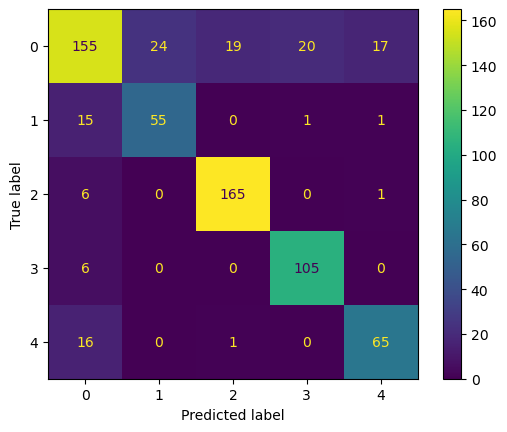

In [16]:
ConfusionMatrixDisplay.from_estimator(hybrid_model, X_test, y_test)

In [ ]:
import numpy as np
import pandas as pd

# Define the function to take user input and make predictions
def predict_customer_cluster(model):
    # Define feature names based on dataset
    features = [
        "Age", "Education", "Marital Status", "Parental Status", "Children",
        "Income", "Total_Spending", "Days_as_Customer", "Recency",
        "Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold",
        "Web", "Catalog", "Store", "Discount Purchases", "Total Promo", "NumWebVisitsMonth"
    ]
    
    # Take input from user
    user_data = []
    print("\nEnter customer details:")
    for feature in features:
        value = input(f"{feature}: ")
        try:
            # Convert input to float if it's a numeric feature
            user_data.append(float(value))
        except ValueError:
            print("Invalid input. Please enter a number.")
            return
    
    # Convert to DataFrame (1 row, same feature order)
    user_df = pd.DataFrame([user_data], columns=features)
    
    # Predict cluster
    predicted_cluster = model.predict(user_df)
    
    print(f"\nPredicted Customer Cluster: {predicted_cluster[0]}")

# Call the function with the trained model
predict_customer_cluster(hybrid_model)


Enter customer details:
